In [1]:
import os.path
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yt
import glob
import pandas as pd
import math
import scipy.integrate as integrate
from matplotlib.backends.backend_pdf import PdfPages
mpl.rcParams['figure.dpi'] = 400

/home/dbeckers/.conda/envs/postprocessing/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [10]:
root_dir = '/home/dbeckers/tests/scalar_advection'

In [47]:
# methods = ['godunov_ppm','godunov_weno_z','mol_central']
method_suffix = '_cfl_study'
# methods = ['godunov_ppm']
methods = ['godunov_weno_z']
# methods = ['mol_central_CFL_0.5']
# methods = ['godunov_ppm','godunov_weno_z']
# methods = ['mol_central','periodic_mol_central']


case = 'yalla2021/eta_2'
# case = 'tophat'
# case = 'gaussian'
# grid_types = ['uniform','fine_to_coarse']
# grid_types = ['fine_to_coarse']
grid_types = ['uniform']
grid_sizes = [64*2**i for i in range(5)]
dx_list = [Lx/grid_size for grid_size in grid_sizes]
cfl_list = [0.1,0.5,1.0]

print(grid_sizes)
color_list = [
    "#EE2E2F",
    "#008C48",
    "#185AA9",
    "#F47D23",
    "#662C91",
    "#A21D21",
    "#B43894",
    "#010202",
]
linestyle_list = [
    "solid",
    "dashed",
    "dotted",
    "dashdot"
]
marker_list = [
    "o",
    "*",
    "P",
    "^"
]
linewidth_list = [
    1.5,
    0.5
]

[64, 128, 256, 512, 1024]


In [48]:
%%capture

fig4, ax4 = plt.subplots(figsize=(10, 6))

error_lists = [[[[] for i in range(len(cfl_list))] for j in range(len(grid_types))] for c in range(len(methods))]

k = -1
for method in methods:
    k += 1
    g = -1
    for grid_type in grid_types:
        g += 1
        m = -1
        for cfl in cfl_list:
            m += 1
            l = -1
            for grid_size in grid_sizes:
                l += 1
            
                case_dir = os.path.join(root_dir, method+method_suffix, case, grid_type, f'CFL_{cfl}_nx_{grid_size}')
            
                error_file = os.path.join(case_dir,'error.log')
                with open(error_file) as f:
                    lines = f.readlines()
                    error_levels = len(lines[1].split())-1
                    time = [float(line.split()[0]) for line in lines]
                    for level in reversed(range(error_levels)):
                        error = [float(line.split()[level+1]) for line in lines]
                        ax1.plot(time, error, color=color_list[l], linestyle=linestyle_list[k], linewidth=linewidth_list[g],label=f'{method}; nx = {grid_size}; grid type = {grid_type}; level {level}')
 
                # Add error to list for log-log plot
                error_lists[k][g][m].append(error[-1])

            ax4.plot(dx_list,error_lists[k][g][m],linestyle=linestyle_list[k],linewidth=linewidth_list[g],marker=marker_list[m],color='black',label=f'{method}; CFL = {cfl}; grid type = {grid_type}')

ax4.plot(dx_list,[1e4*dx**2 for dx in dx_list],label='dx^2')
ax4.plot(dx_list,[1e6*dx**3 for dx in dx_list],label='dx^3')
ax4.plot(dx_list,[1e8*dx**4 for dx in dx_list],label='dx^4')


FileNotFoundError: [Errno 2] No such file or directory: '/home/dbeckers/tests/scalar_advection/godunov_weno_z_cfl_study/yalla2021/eta_2/uniform/CFL_0.1_nx_64/error.log'

No handles with labels found to put in legend.


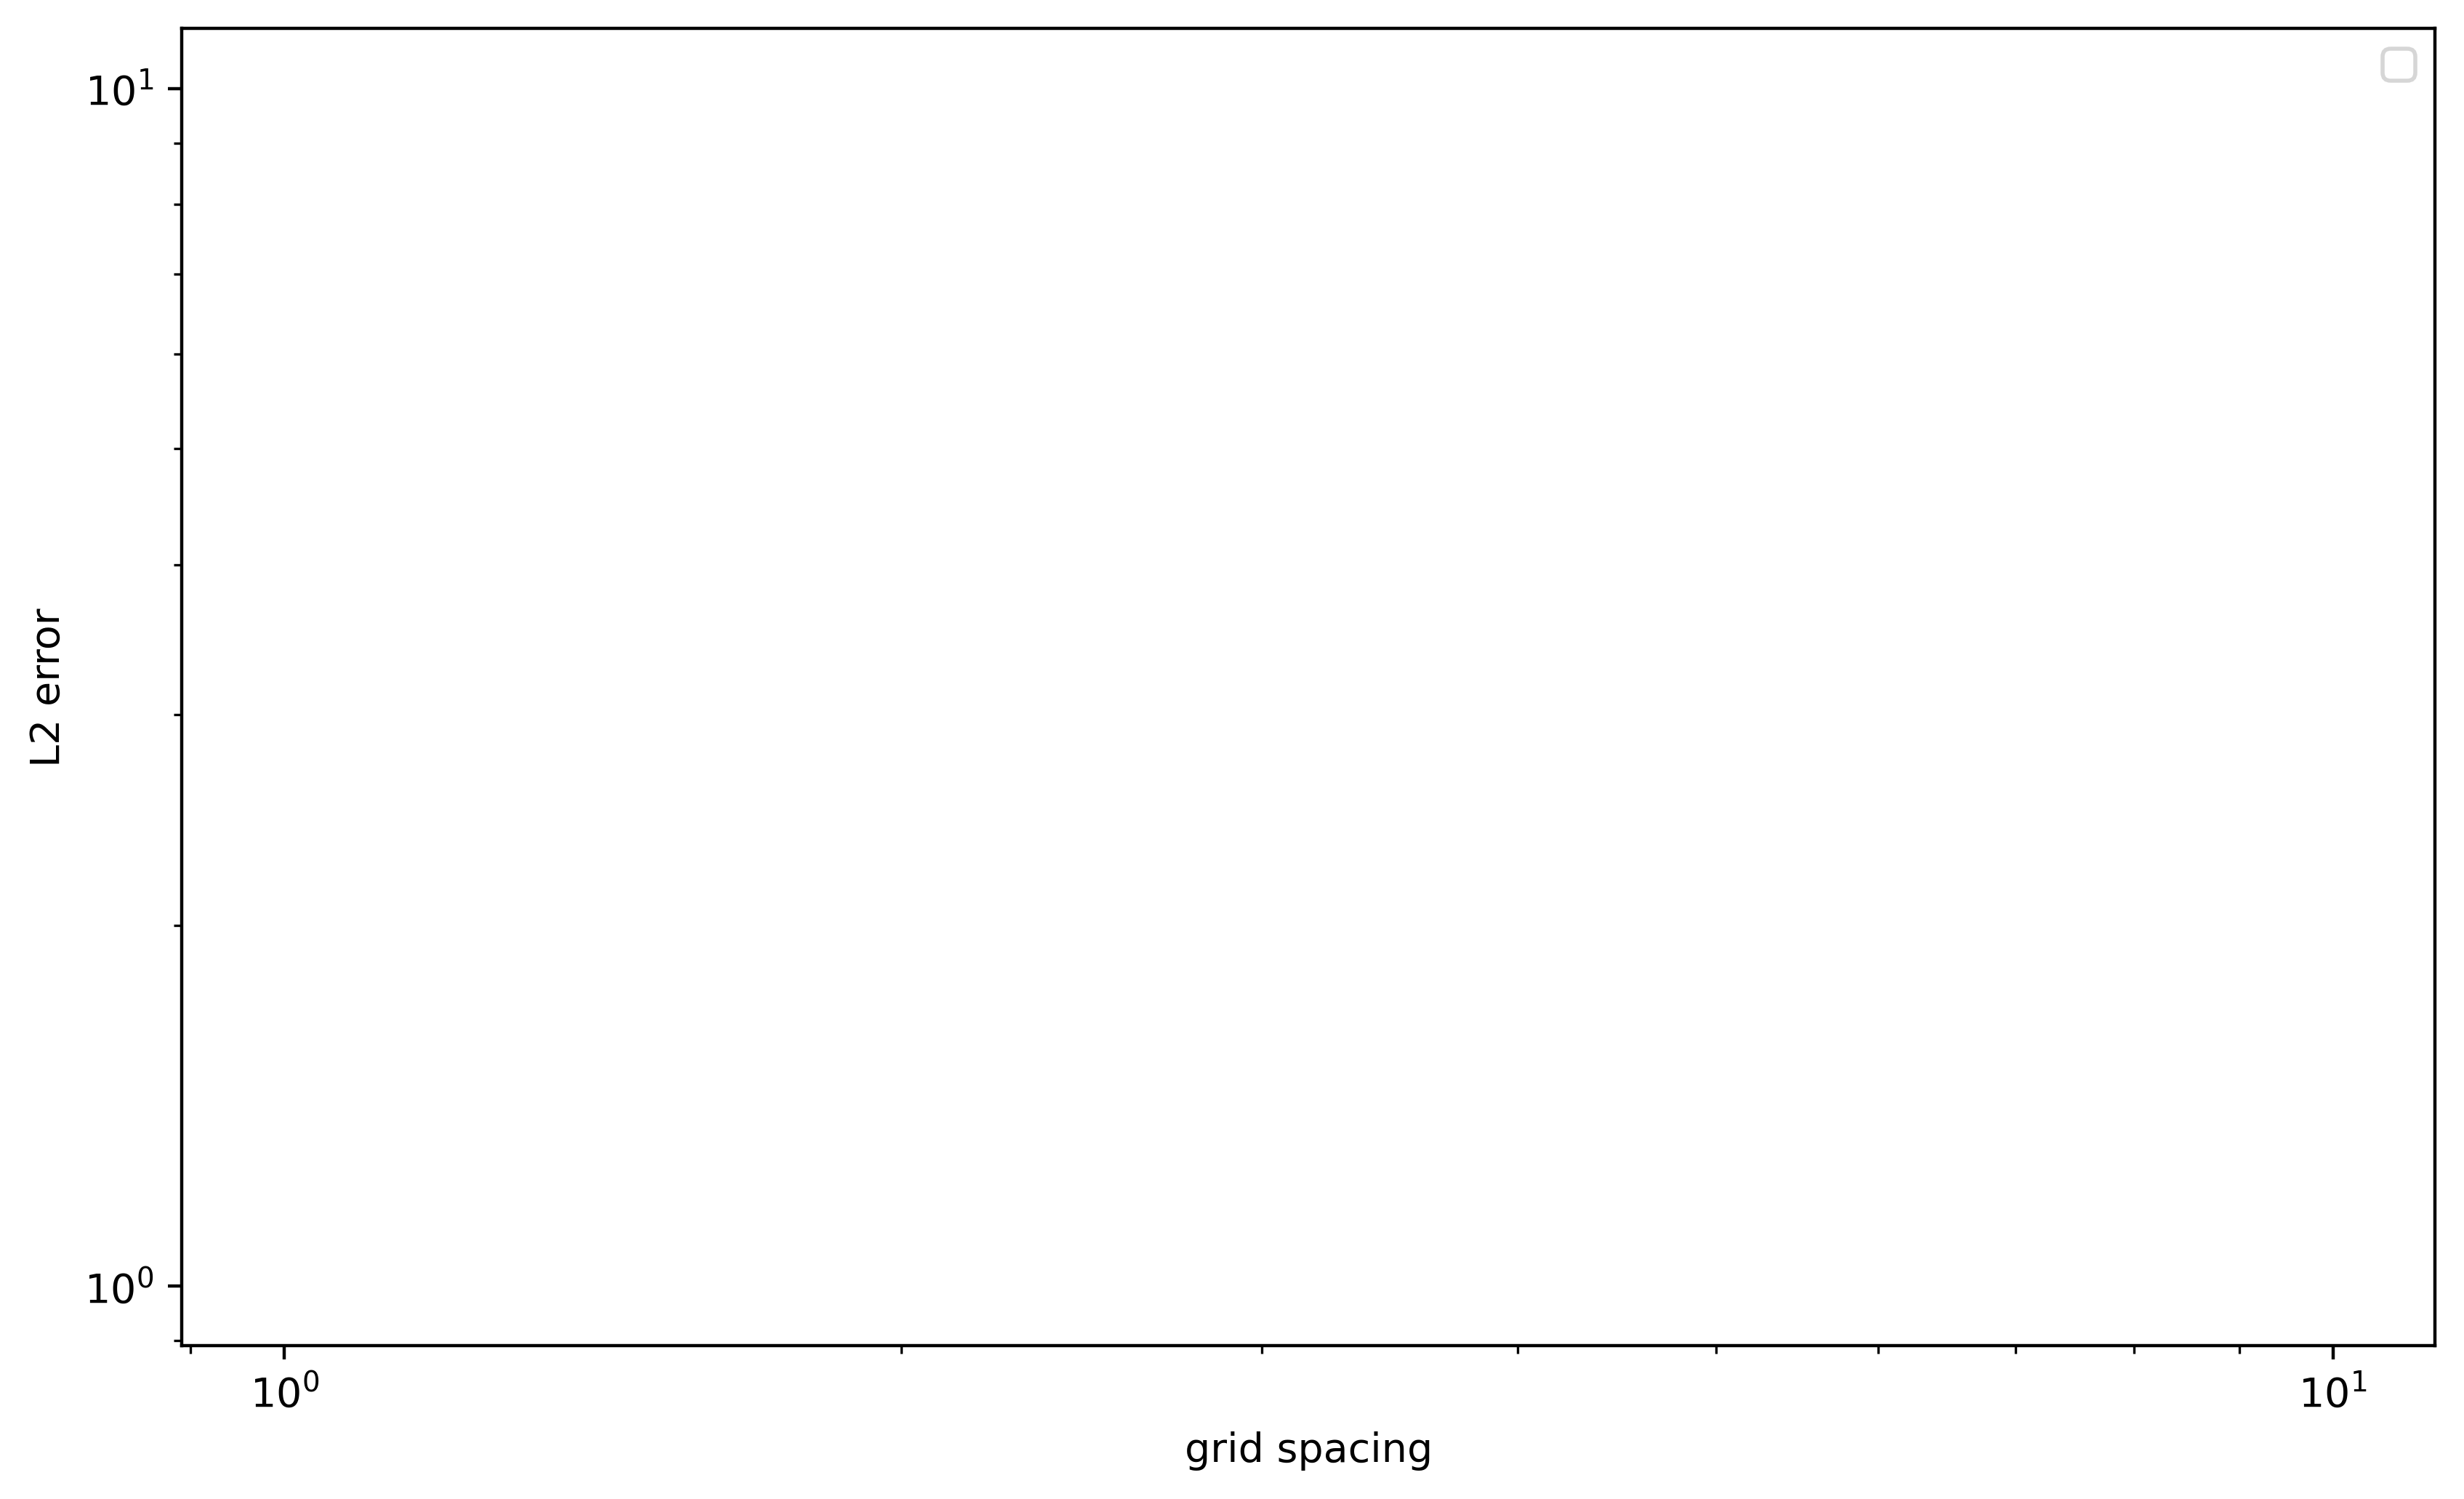

In [49]:
ax4.set_xlabel('grid spacing')
ax4.set_ylabel('L2 error')
ax4.set_title('')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.legend()

# ax4.set_ylim([1e-4,1])
fig4